<a href="https://colab.research.google.com/github/Nattakonjpg/Coffee-Shop-Sales/blob/main/Coffee_Shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install package

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data.xlsx


In [3]:
file_path = '/content/drive/MyDrive/Data/Bank/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


##Question 3 Which products are sold most and least often?
- Which drive the most revenue for the business?


#### สร้าง dataframe แยกร้านทั้ง 3

In [5]:
df_3 =df.copy()
df_Hell = df_3[df_3['store_location']=="Hell's Kitchen"]
df_Low = df_3[df_3['store_location']=="Lower Manhattan"]
df_AS= df_3[df_3['store_location']=="Astoria"]

####Dataframe ร้าน Hell's Kitchen
- groupby ข้อมูลด้วย วันที่ และ ประเภทสินค้า ด้วยผลรวม จำนวนการขาย และ ราคาสินค้า

In [44]:
df_h_gb = df_Hell.groupby(['transaction_date','product_category'])[['transaction_qty','unit_price']].sum().reset_index()
df_h_gb

,transaction_date,product_category,transaction_qty,unit_price
0,2023-01-01,Bakery,18,65.25
1,2023-01-01,Coffee,133,278.65
2,2023-01-01,Drinking Chocolate,17,55.00
3,2023-01-01,Tea,102,185.75
4,2023-01-02,Bakery,23,81.50
...,...,...,...,...
1254,2023-06-30,Drinking Chocolate,31,84.75
1255,2023-06-30,Flavours,40,20.00
1256,2023-06-30,Loose Tea,3,27.95
1257,2023-06-30,Packaged Chocolate,5,41.33


#### เพิ่มคอลัมน์ วัน เดือน ปี
- จากข้อมูล Transaction_date -> สำหรับสร้างกราฟแยกรายเดือน

In [15]:
df_h_gb['year'] = df_h_gb['transaction_date'].dt.year
df_h_gb['month'] = df_h_gb['transaction_date'].dt.month
df_h_gb['day'] = df_h_gb['transaction_date'].dt.day

In [28]:
dft1 = df_h_gb.groupby(['product_category'])['transaction_qty'].sum().reset_index()

,product_category,transaction_qty
0,Bakery,7678
1,Branded,119
2,Coffee,30220
3,Coffee beans,790
4,Drinking Chocolate,5672
5,Flavours,3596
6,Loose Tea,485
7,Packaged Chocolate,197
8,Tea,22980


<ipython-input-42-ec8da3620b89>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( # Assign the plot to an axis object 'ax'


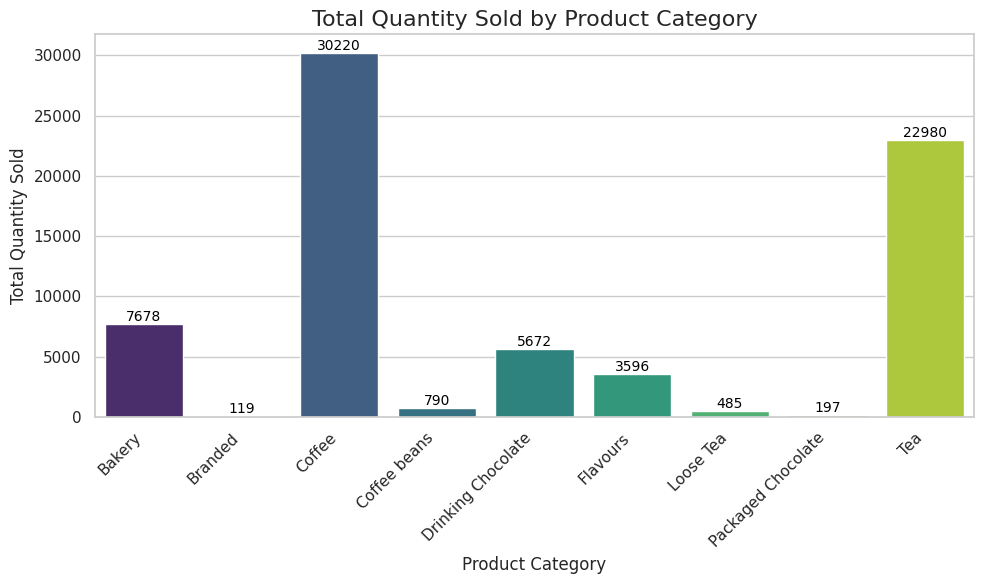

In [42]:
# Set a nice style for the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Create the bar plot
ax = sns.barplot( # Assign the plot to an axis object 'ax'
    data=dft1,
    x='product_category',
    y='transaction_qty',
    palette='viridis'
)

for p in ax.patches: # Iterate over each bar in the plot
    ax.annotate(f'{p.get_height():.0f}', # Format the height (transaction_qty) as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()), # Position x, y
                ha='center', va='center', # Horizontal and vertical alignment
                xytext=(0, 5), # Offset the text a bit above the bar
                textcoords='offset points', # Use offset points for xytext
                fontsize=10,
                color='black')


plt.title('Total Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

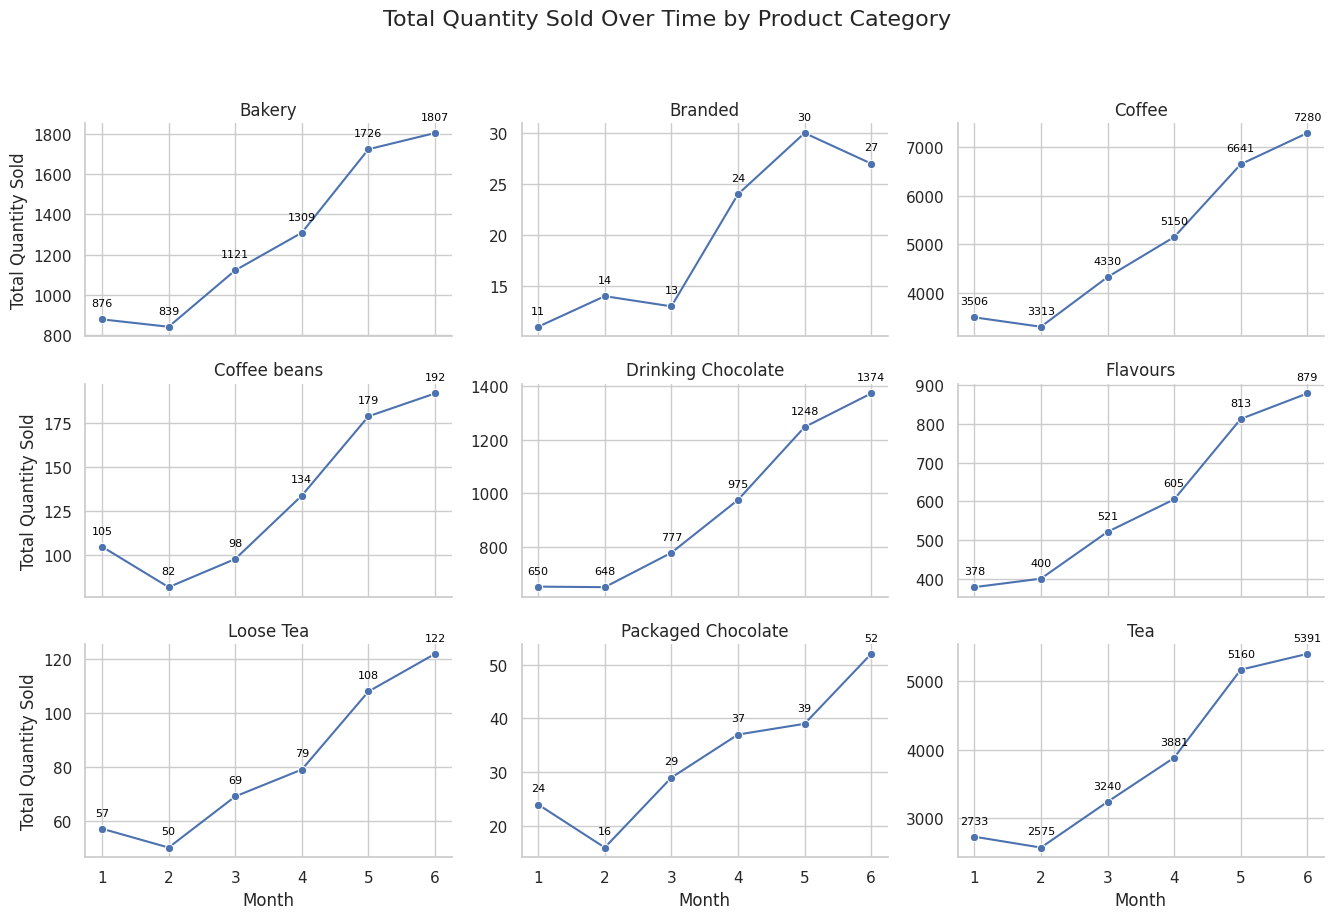

In [43]:
df_plot = df_h_gb.groupby(['product_category', 'month'])['transaction_qty'].sum().reset_index()

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Create a grid of line plots
g = sns.relplot(
    data=df_plot, # IMPORTANT: Use the AGGREGATED df_plot here for monthly sums
    x='month',
    y='transaction_qty',
    col='product_category',
    kind='line',
    col_wrap=3,
    height=3,
    aspect=1.5,
    facet_kws={'sharey': False},
    marker='o' # Add circle markers
)

# --- 4. Add Numerical Labels on Top of Each Marker ---
# Iterate through each individual subplot (Axes) in the FacetGrid
for ax in g.axes.flat:
    # Get the product_category for the current subplot from its title
    # The title usually follows the format 'product_category = [Category Name]'
    if ax.get_title():
        current_category = ax.get_title().split(' = ')[1]
    else:
        # Fallback if title format is unexpected; this shouldn't typically happen with relplot
        print(f"Warning: Could not parse category from title for subplot. Skipping labels for this subplot.")
        continue

    # Filter the aggregated data (df_plot) for the current product_category
    # This gets the specific (month, transaction_qty) points for this subplot
    category_data = df_plot[df_plot['product_category'] == current_category]

    # Annotate each data point on the current subplot
    for _, row in category_data.iterrows(): # Using _ for index as it's not needed
        # ax.annotate is used to add text to the plot
        ax.annotate(f'{row["transaction_qty"]:.0f}', # The text to display (formatted as integer)
                    (row['month'], row['transaction_qty']), # The (x,y) coordinates of the point
                    textcoords="offset points", # How to interpret xytext (as offsets from xy)
                    xytext=(0, 8), # Offset text 8 points directly above the marker
                    ha='center', # Horizontal alignment: center the text
                    va='bottom', # Vertical alignment: align text bottom with the point
                    fontsize=8, # Font size for the label
                    color='black') # Color of the label text

# --- 5. Final Plot Adjustments ---
g.set_axis_labels("Month", "Total Quantity Sold")
g.set_titles(col_template="{col_name}") # Use just the category name for subplot titles
plt.suptitle('Total Quantity Sold Over Time by Product Category', y=1.02, fontsize=16) # Main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()